# Quickstart: Restaurant tipping demo

Demo built to match Matlab's restaurant tipping example, which I'll dare to call the Hello World of Fuzzy Logic.

For the original explanation visit https://www.mathworks.com/help/fuzzy/working-from-the-command-line.html.

In [1]:
import zadeh

## System definition

Define the **input variables**.

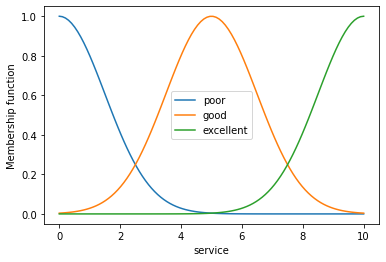

In [2]:
service = zadeh.FuzzyVariable(
    zadeh.FloatDomain("service", 0, 10, 100),
    {
        "poor": zadeh.GaussianFuzzySet(1.5, 0),
        "good": zadeh.GaussianFuzzySet(1.5, 5),
        "excellent": zadeh.GaussianFuzzySet(1.5, 10),
    },
)
service.plot()

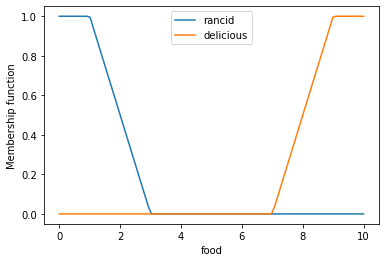

In [3]:
food = zadeh.FuzzyVariable(
    zadeh.FloatDomain("food", 0, 10, 100),
    {
        "rancid": zadeh.TrapezoidalFuzzySet(-2, 0, 1, 3),
        "delicious": zadeh.TrapezoidalFuzzySet(7, 9, 10, 12),
    },
)
food.plot()

Define the **output variable**.

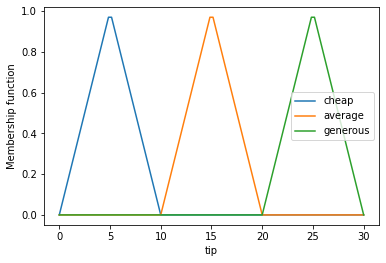

In [4]:
tip = zadeh.FuzzyVariable(
    zadeh.FloatDomain("tip", 0, 30, 100),
    {
        "cheap": zadeh.TriangularFuzzySet(0, 5, 10),
        "average": zadeh.TriangularFuzzySet(10, 15, 20),
        "generous": zadeh.TriangularFuzzySet(20, 25, 30),
    },
)
tip.plot()

Define the **rules**.

In [5]:
# "|"" is fuzzy OR, ">>" if fuzzy implication
rule_set = [
    ((service == "poor") | (food == "rancid")) >> (tip == "cheap"),
    (service == "good") >> (tip == "average"),
    ((service == "excellent") | (food == "delicious")) >> (tip == "generous"),
]


for rule in rule_set:
    print(rule)

if ((service is poor) or (food is rancid)) then (tip is cheap) [1.000000]
if (service is good) then (tip is average) [1.000000]
if ((service is excellent) or (food is delicious)) then (tip is generous) [1.000000]


**Build** the system.

In [6]:
fis = zadeh.FIS([food, service], rule_set, tip)

## Usage

Single prediction

In [7]:
fis.get_crisp_output({"food": 9, "service": 7})

21.048568176040792

Automatically generate an interactive explorer using ipywidgets (only visible when running the notebook)

In [8]:
fis.get_interactive()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='food', max=10.0), FloatSlid…

Plot the surface

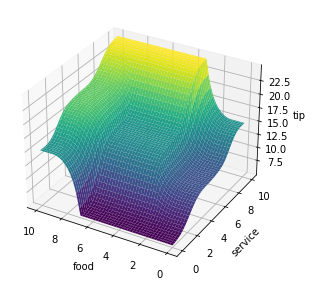

In [9]:
import matplotlib.pyplot as plt

fis.plot_2d(food, service)
plt.tight_layout()

Produce a plot which can be used to explain the rules for a set of values:

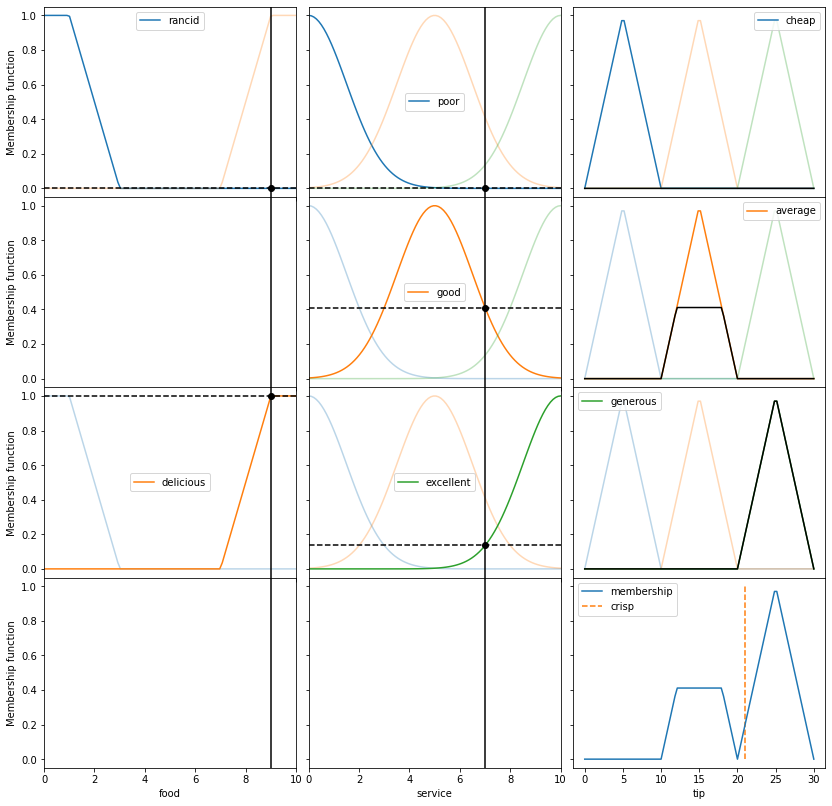

if ((service is poor) or (food is rancid)) then (tip is cheap) [1.000000]
if (service is good) then (tip is average) [1.000000]
if ((service is excellent) or (food is delicious)) then (tip is generous) [1.000000]


In [10]:
fis.plot_rules({"food": 9, "service": 7})
plt.show()
for rule in fis.rules:
    print(rule)

Each row corresponds to a rule in order:
- In the first one there is (almost) no activation of the any of the clasues. Hence, the ouput is null.
- In the second one there is some activation of the antecendent. Hence, the average membership function is the output, bounded by the activation value.
- In the third one, there are two clauses joined by an "or", hence, the activation it the one from the higher one, as reflected in the output.

In the last row, last column, the combination of the output of the rules is shown, as well as the centroid which defines the crisp output.